## MTH377 (Convex Optimisation) - Assessment 1







## Problem 1

##### Question 1

- The given function f(x) which we want to approximate in the vicinity of x = 1 is: 
$$ f(x) = x^2 + \log(x) $$

- Calculating f'(x) and f''(x):
$$ f'(x) = 2x + 1/x $$
$$ f''(x) = 2 - 1/x^2 $$

- The Linear Function approximation (Linear Taylor Polynomial) of f(x) in the vicinity of x = a is:

$$ P_{1,a}(x) = f(a) + f'(a)(x-a) $$

- Thus, P<sub>1,a</sub>(x) = L(x) for the given f(x) is:

$$ L(x) = 1 + 3(x-1) $$
$$      = 3x-2 $$

- Similiarly, the Quadratic Function Approximation (Quadratic Taylor Polynomial) of f(x) in the vicinity of x = a is:

$$ P_{2,a}(x) = f(a) + f'(a)(x-a) + (f''(a)/2)(x-a)^2$$

- Thus, P<sub>2,a</sub>(x) = Q(x) for the given f(x) is:

$$ Q(x) = 1 + 3(x-1) + (1/2)(x-1)^2 $$
$$      = 3x-2 + (1/2)(x-1)^2 $$
$$      = L(x) + (1/2)(x-1)^2 $$

- Therefore in the code given we make three seperate functions f(x), L(x) and Q(x). We make an array containing all values between 0 and 2 and then use every element of this list as an input to these 3 functions.

- For each function we have a separate list which has the value of the respective function for the corresponding value of x between 0 and 2.

- We then use these arrays with matplotlib to plot our graphs for the 3 functions in the same graph.

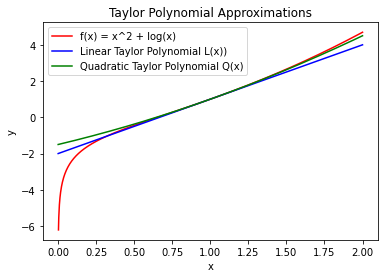

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x): # Function for plotting f(x)
  return ((x)**2 + math.log(x))

# We use numpy.linspace to make an array 'arr' contain values between 0 and 2 with 1000 values. (to ensure smoothness of the plot)
arr = np.linspace(0,2,1000)

# Initializing the lists to store the values of f(x), L(x) and Q(x) for each value of x between 0 and 2
res1 = []
resL = []

resQ = []

def L(x): #Function for plotting the Linear Taylor Polynomial (expression derived above)
  return (3*x-2)

def Q(x): #Function for plotting the Quadratic Taylor Polynomial (expression derived above)
  return (L(x) + ((x-1)**2)/2)

for i in arr:
  if(i == 0):
    res1.append(-math.inf) # This if-condition is added to prevent a domain error when plotting log(x) when x = 0.
  else:
    res1.append(f(i))

# Appending the values of L(x) and Q(x) to the respective lists for each value of x between 0 and 2
for i in arr:
  resL.append(L(i))

for i in arr:
  resQ.append(Q(i))


# Plotting the graphs of f(x), L(x) and Q(x) using matplotlib.pyplot
plt.plot(arr, res1, color = 'red', label = 'f(x) = x^2 + log(x)')
plt.plot(arr, resL, color = 'blue', label = 'Linear Taylor Polynomial L(x))')
plt.plot(arr, resQ, color = 'green', label = 'Quadratic Taylor Polynomial Q(x)')

# Adding labels and legend to the plot
plt.title("Taylor Polynomial Approximations")
plt.xlabel('x')
plt.ylabel('y')

# Showing the legend
plt.legend()

# Showing the plot
plt.show()

- We see that for the plot, in the vicinity of x = 1, the approximations hold true and give a very accurate value for f(x).

### Question 2



- The error associated with the linear approximation (e<sub>L</sub>(x)) is given by:
$$ e_L(x) = f(x) - L(x) $$

- Therefore the expression for e<sub>L</sub>(x) is as follows:
$$ 
e_L(x) = x^2 + \log(x) - (3x-2)
       = x^2 + \log(x) - 3x + 2
$$

- We need to plot the following expression:
$$ \frac {e_L(x)}{x-1} $$

- We are going to define a function for it. Since we are plotting for x = [0,2], points of discontinuities are x = 0 and x = 1.

- Therefore taking for x = 0:
$$ 
\lim_{x \to 0} \frac{e_L(x)}{x-1} = \frac {0 - \infty - 0 + 2}{-1} = \infty
$$

- Therefore taking for x = 1:
$$ 
\lim_{x \to 1} \frac{e_L(x)}{x-1} = \frac {1 + 0 - 3 + 2}{1 - 1} = \frac {0}{0}
$$
- Since this is 0/0 form, we apply L'Hopital's Rule:
$$ 
\lim_{x \to 1} \frac{\frac{\partial e_L(x)}{\partial x}}{\frac{\partial (x-1)}{\partial x}} = \lim_{x \to 1} \frac {2x + 1/x - 3}{1} = 0
$$


In [2]:
# Defining the function eL(x) as defined in the question taking into account the special cases of x = 0 and x = 1 as mentioned above
def eL(x):
    if(x == 0):
        return math.inf
    elif(x == 1):
        return 0
    else:
        return (f(x) - L(x))/(x-1)
    
# Initializing the list to store the values of eL(x) for each value of x between 0 and 2    
res_eLx = []

# Appending the values of eL(x) to the list for each value of x between 0 and 2 (by using arr created in question 1)
for i in arr:
    res_eLx.append(eL(i))


- The error associated with the quadratic approximation (e<sub>Q</sub>(x)) is given by:
$$ e_Q(x) = f(x) - Q(x) $$

- Therefore the expression for e<sub>L</sub>(x) is as follows:
$$ 
e_Q(x) = x^2 + \log(x) - [L(x) - (1/2)(x-1)^2]
       = x^2 + \log(x) - 3x + 2 - (1/2)(x-1)^2
$$

- We need to plot the following expression for x = [0,2]:
$$ \frac {e_Q(x)}{(x-1)^2} $$

- We are going to define a function for it. Since we are plotting for x = [0,2], points of discontinuities are x = 0 and x = 1.

- Therefore taking for x = 0:
$$ 
\lim_{x \to 0} \frac{e_Q(x)}{(x-1)^2} = \frac {0 - \infty - 0 + 2 - 0.5}{(-1)^2} = -\infty
$$

- Therefore taking for x = 1:
$$ 
\lim_{x \to 1} \frac{e_Q(x)}{(x-1)^2} = \frac {1 + 0 - 3 + 2 - 0}{1 - 1} = \frac {0}{0}
$$
- Since this is 0/0 form, we apply L'Hopital's Rule:
$$ 
\lim_{x \to 1} \frac{\frac{\partial^{2} e_Q(x)}{\partial x^2}}{\frac{\partial^{2} (x-1)^2}{\partial x^2}} = \lim_{x \to 1} \frac {2 - 1/x^2 - 0 - 1}{2} = 0
$$

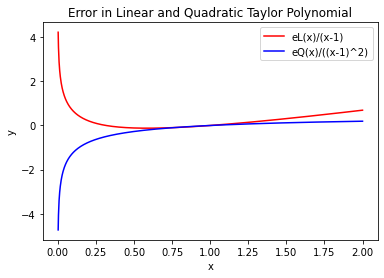

In [3]:
# Defining the function eQ(x) as defined in the question taking into account the special cases of x = 0 and x = 1 as mentioned above
def eQ(x):
    if(x == 0):
        return (-math.inf)
    elif(x == 1):
        return 0
    else:
        return (f(x) - Q(x))/((x-1)**2)

# Initializing the list to store the values of eQ(x) for each value of x between 0 and 2
res_eQx = []

# Appending the values of eQ(x) to the list for each value of x between 0 and 2 (by using arr created in question 1)
for i in arr:
    res_eQx.append(eQ(i))

# Plotting the graphs of eL(x) and eQ(x) using matplotlib.pyplot using the 2 arrays created above
# Red indicates the error in the Linear Approximation 
# Blue indicates the error in the Quadratic Approximation
plt.plot(arr, res_eLx, color = 'red', label = 'eL(x)/(x-1)')
plt.plot(arr, res_eQx, color = 'blue', label = 'eQ(x)/((x-1)^2)')

# Adding labels and legend to the plot
plt.title("Error in Linear and Quadratic Taylor Polynomial")
plt.xlabel('x')
plt.ylabel('y')

# Showing the legend
plt.legend()

# Showing the plot
plt.show()
